# Polynomial Linear Regression Dataset

## 1. Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Loading the Dataset

In [3]:
df = pd.read_csv(r'E:\Neuronetix Traning\Tasks\Task1\Datasets\rank_salary.csv')

In [4]:
# Display the first few rows
df.head()

# Display the last few rows
df.tail()

# Get the shape of the dataset (rows, columns)
df.shape

# Get a summary of the dataset
df.info()

# Summary statistics of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## 3. Exploratory Data Analysis (EDA)

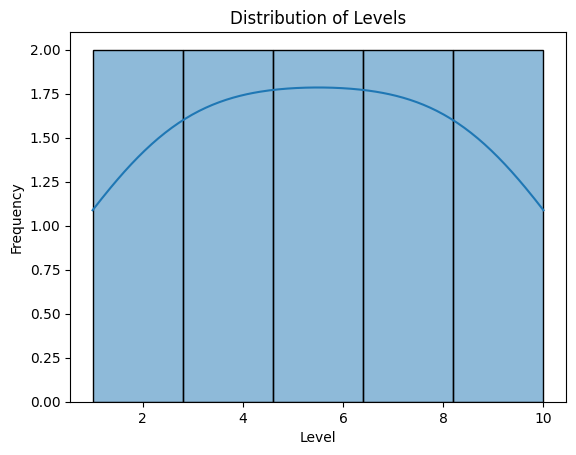

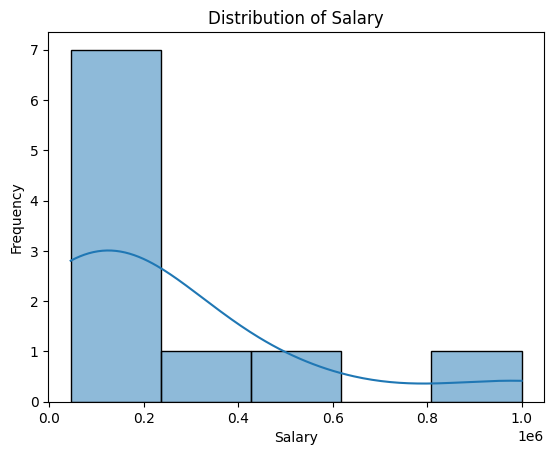

In [24]:
# Distribution of the independent variable
sns.histplot(df['Level'], kde=True)
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.show()

# Distribution of the dependent variable
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


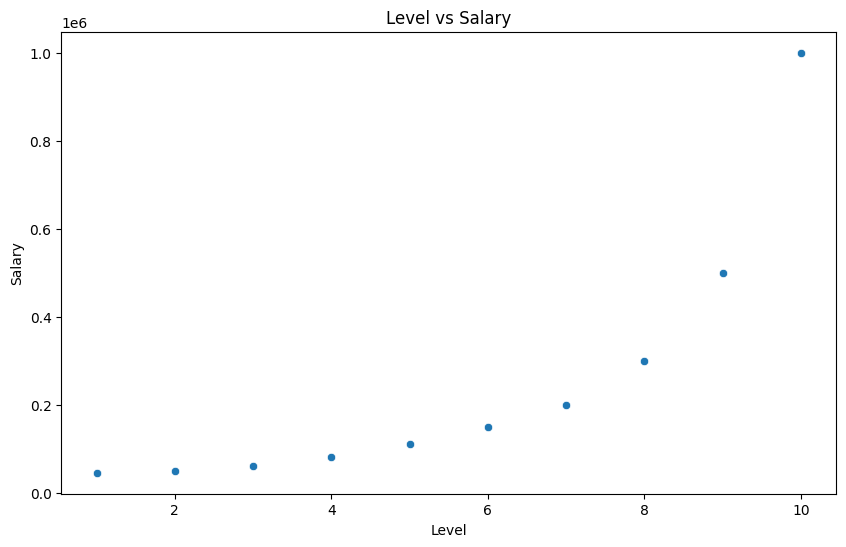

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Level', y='Salary', data=df)
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()


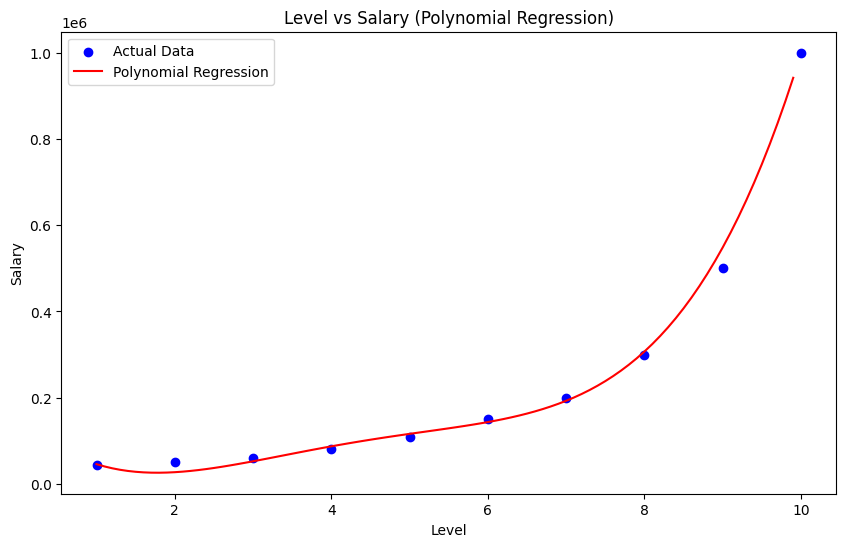

In [23]:
# Ensure X_grid has the correct shape and format
X_grid = np.arange(min(X['Level']), max(X['Level']), 0.1).reshape(-1, 1)

# Convert X_grid to a DataFrame to match the feature names
X_grid_df = pd.DataFrame(X_grid, columns=['Level'])

# Plotting the Polynomial Regression curve
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual Data')

# Plotting the Polynomial Regression curve
plt.plot(X_grid_df, model.predict(poly.transform(X_grid_df)), color='red', label='Polynomial Regression')

plt.title('Level vs Salary (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()




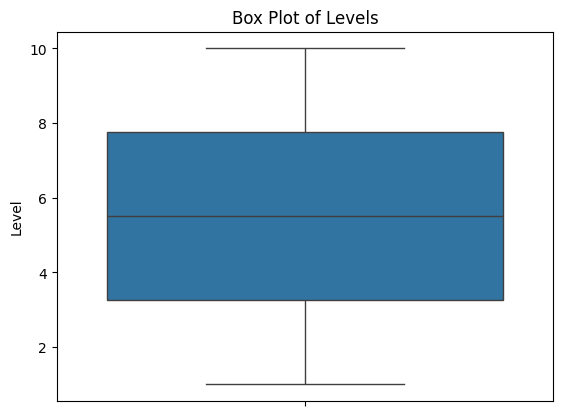

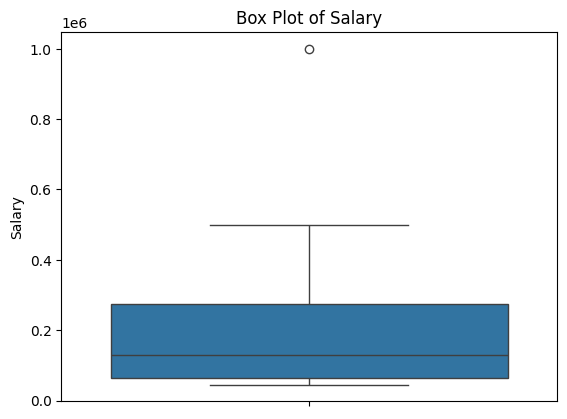

In [10]:
# Box plot for Level
sns.boxplot(y=df['Level'])
plt.title('Box Plot of Levels')
plt.show()

# Box plot for Salary
sns.boxplot(y=df['Salary'])
plt.title('Box Plot of Salary')
plt.show()



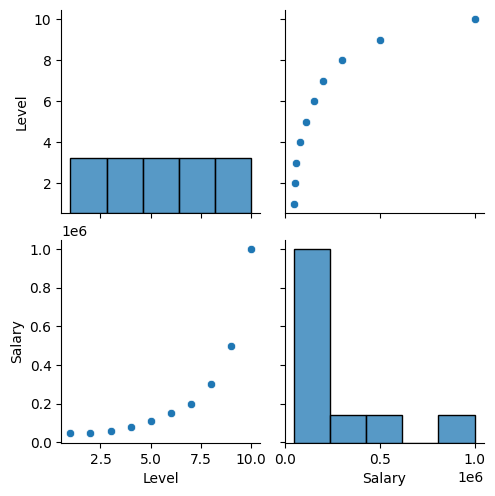

In [19]:
sns.pairplot(df)
plt.show()


## 4. Preparing the Data

In [11]:
X = df[['Level']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Transforming the data to include polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


## 5. Building and Training the Polynomial Regression Model

In [14]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

## 6. Making Predictions and Evaluating the Model

In [15]:
# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1444499305.5435529
R^2 Score: 0.9714666803843249


## 7. Summary of Findings

* The dataset consists of variables `Level` and `Salary`.
* Polynomial regression was applied with a degree of 4.
* The regression model's \( R^2 \) score is `0.9714666803843249e`, indicating the model's fit.